In [28]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 13.3 MB/s eta 0:00:00


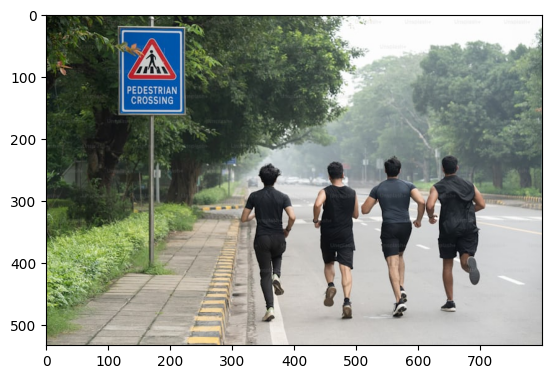

In [54]:
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

image_url = "https://plus.unsplash.com/premium_photo-1726403422010-4cf1c12fb721?w=800&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTN8fHBlZGVzdHJpYW5zJTIwZnJvbSUyMGNhcnxlbnwwfHwwfHx8MA%3D%3D"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)

100%|██████████| 5.90M/5.90M [00:00<00:00, 57.6MB/s]



0: 640x640 4 persons, 758.8ms
Speed: 0.0ms preprocess, 758.8ms inference, 34.6ms postprocess per image at shape (1, 3, 640, 640)


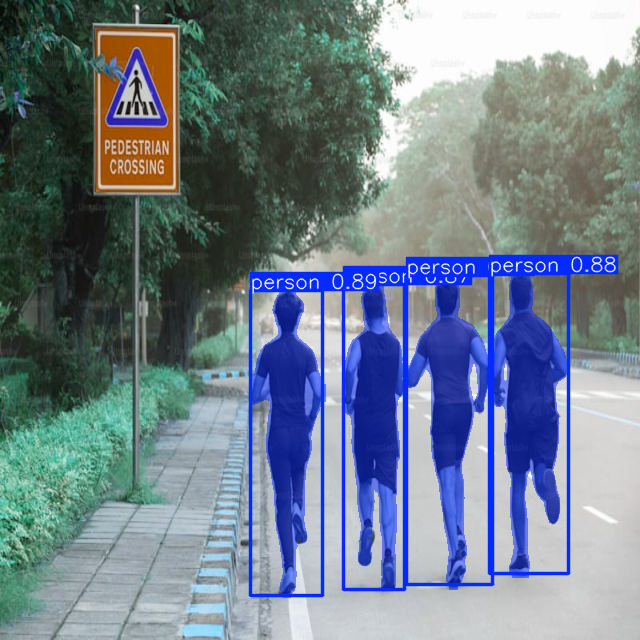

In [52]:
from ultralytics import YOLO
import torchvision.transforms as transforms

# Transform image to be square with dimensions divisible by 32
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Adjusting to a 256x256 square
    transforms.ToTensor()
])

img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension to make it (1, 3, 640, 640)

# Load the pretrained YOLO model
model = YOLO("yolo11n-seg.pt")  # YOLO model trained on ImageNet

# Predict with the model on the transformed image
results = model(img_tensor)

for result in results:
    result.show()  # display to screen

In [ ]:
g